# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, precision_recall_curve, accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

# Trial 1

## Logistic Regression

In [2]:
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

In [3]:
df.head

<bound method NDFrame.head of       Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax

In [4]:
# Separate the features (x) and the target variable (y)
y = df['Bankrupt?']
x = df.drop(columns=['Bankrupt?'])

# Split the dataset into the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [5]:
# regularization constant (strength)
REG_CONST = 0.01

# Create a model and fit it to the training data.
# C := inverse of regularization strength
model = LogisticRegression(penalty='l2', C=1./REG_CONST, max_iter=300)
model.fit(x_train_scaled, y_train)

# Predict the classes of test data and measure the accuracy of test data
y_pred = model.predict(x_test_scaled)
acc = (y_pred == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))


Accuracy of test data = 0.960


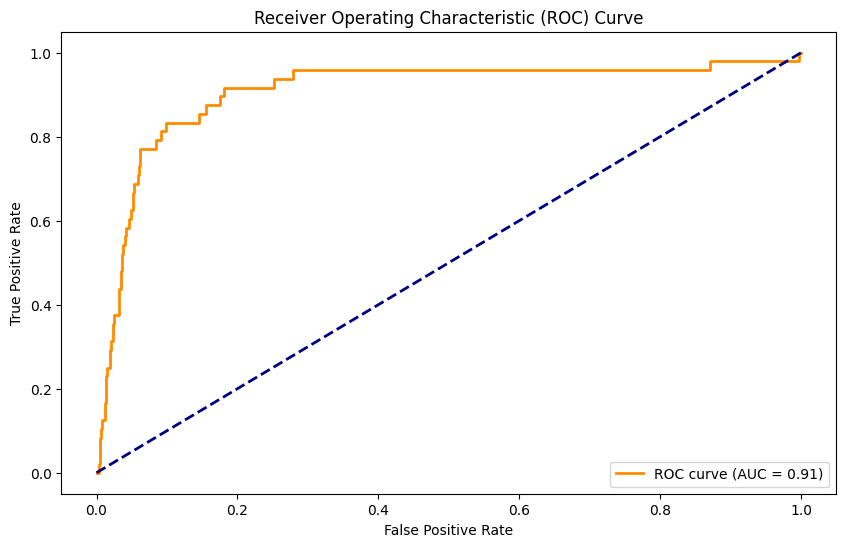

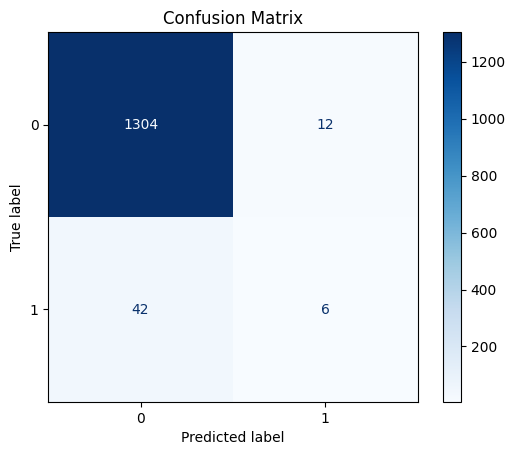

AUC Score: 0.908
F1 Score: 0.182

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1316
           1       0.33      0.12      0.18        48

    accuracy                           0.96      1364
   macro avg       0.65      0.56      0.58      1364
weighted avg       0.95      0.96      0.95      1364



In [6]:
# Get prediction probabilities 
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1317
           1       0.34      0.47      0.39        47

    accuracy                           0.95      1364
   macro avg       0.66      0.72      0.68      1364
weighted avg       0.96      0.95      0.95      1364

Confusion Matrix:
[[1274   43]
 [  25   22]]


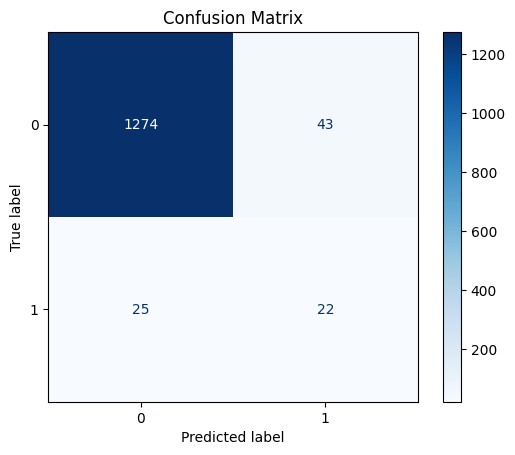

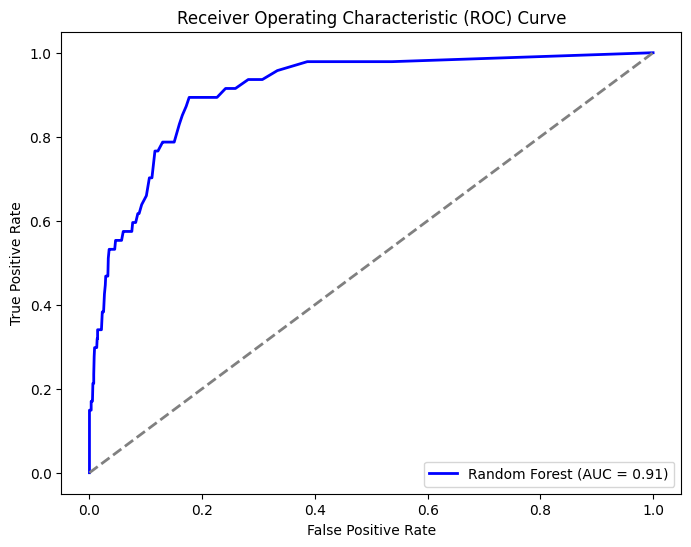

AUC Score: 0.9103


In [7]:
# Create training and test data
y = np.array(df['Bankrupt?'])
x = np.array(df.drop('Bankrupt?', axis=1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Standardize features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_scaled, y_train)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model.predict(x_test_scaled)

# Evaluate the model

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display confusion matrix as a heatmap
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC Score
print(f"AUC Score: {roc_auc:.4f}")


/var/folders/c9/83t_p7011dv7z71pbzhhwr700000gn/T/ipykernel_1007/4281403622.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')


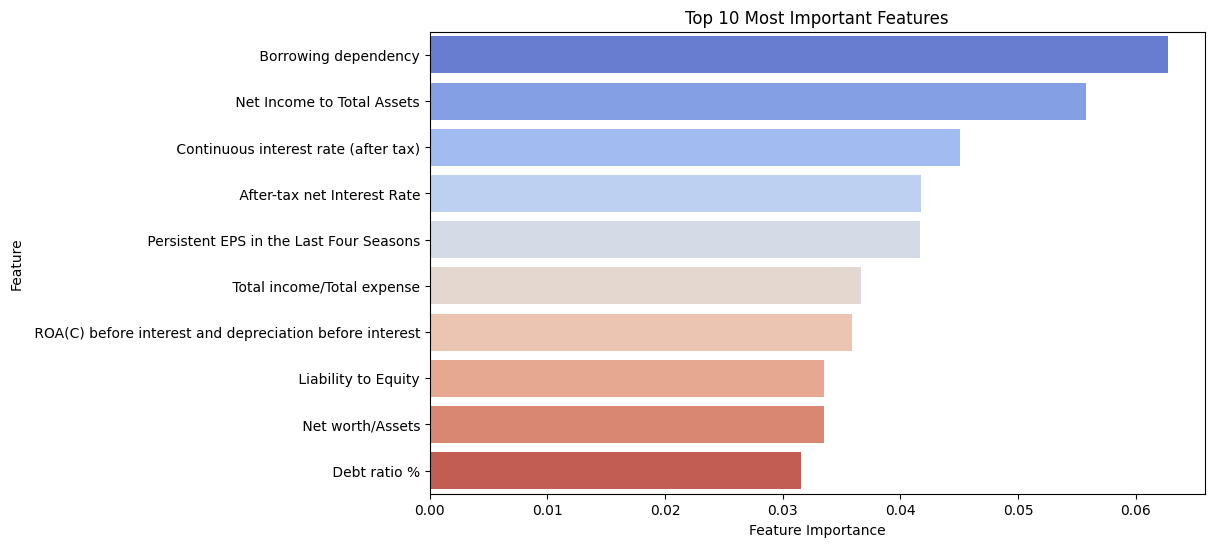

Top 10 Most Important Features:
                                              Feature  Importance
39                               Borrowing dependency    0.062745
85                         Net Income to Total Assets    0.055792
9                Continuous interest rate (after tax)    0.045035
7                         After-tax net Interest Rate    0.041774
18            Persistent EPS in the Last Four Seasons    0.041633
68                         Total income/Total expense    0.036650
0    ROA(C) before interest and depreciation befor...    0.035861
90                                Liability to Equity    0.033525
37                                   Net worth/Assets    0.033495
36                                       Debt ratio %    0.031576


In [8]:
x = df.drop(columns=['Bankrupt?']) 
y = df['Bankrupt?']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


# Get feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_

# Create a DataFrame to view the feature importance with corresponding feature names
# Use the original feature names from the X DataFrame, since X_train_resampled is a numpy array now
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,  # Feature names from the original DataFrame X
    'Importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='coolwarm')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Optionally: print the feature importance table (Top 10)
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

# Trial 2

## Logistic Regression

In [10]:
# Checking the distribution of the target variable 'Bankrupt?'
target_distribution = df['Bankrupt?'].value_counts(normalize=True) * 100

# Displaying the class balance
print(target_distribution)

Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64


In [11]:
# Separating features and target
x = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']

# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Normalizing the features using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Applying SMOTE to address class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

# Displaying the class distribution after SMOTE
print(pd.Series(y_train_balanced).value_counts())

Bankrupt?
0    4619
1    4619
Name: count, dtype: int64


In [13]:
# Train Logistic Regression with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(x_train_balanced, y_train_balanced)

# Predictions and evaluation
y_pred = model.predict(x_test_scaled)
y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1980
           1       0.18      0.73      0.29        66

    accuracy                           0.89      2046
   macro avg       0.59      0.81      0.61      2046
weighted avg       0.96      0.89      0.92      2046

AUC-ROC Score: 0.8912


/Users/anthea/Desktop/1-DAC-Curriculum/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## CART

In [14]:
# Train a CART model (Decision Tree Classifier)
cart_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=None)
cart_model.fit(x_train_balanced, y_train_balanced)

# Predictions and evaluation for CART
y_pred_cart = cart_model.predict(x_test_scaled)
y_pred_cart_proba = cart_model.predict_proba(x_test_scaled)[:, 1]

# Evaluate CART
print("CART Classification Report:")
print(classification_report(y_test, y_pred_cart))
print(f"CART AUC-ROC Score: {roc_auc_score(y_test, y_pred_cart_proba):.4f}")

CART Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1980
           1       0.28      0.48      0.36        66

    accuracy                           0.94      2046
   macro avg       0.63      0.72      0.66      2046
weighted avg       0.96      0.94      0.95      2046

CART AUC-ROC Score: 0.7217


## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100,  # Number of trees
    max_depth=None     # Let the trees grow fully
)
rf_model.fit(x_train_balanced, y_train_balanced)

# Predictions and evaluation for Random Forest
y_pred_rf = rf_model.predict(x_test_scaled)
y_pred_rf_proba = rf_model.predict_proba(x_test_scaled)[:, 1]

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Random Forest AUC-ROC Score: {roc_auc_score(y_test, y_pred_rf_proba):.4f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1980
           1       0.42      0.53      0.47        66

    accuracy                           0.96      2046
   macro avg       0.70      0.75      0.72      2046
weighted avg       0.97      0.96      0.96      2046

Random Forest AUC-ROC Score: 0.9472


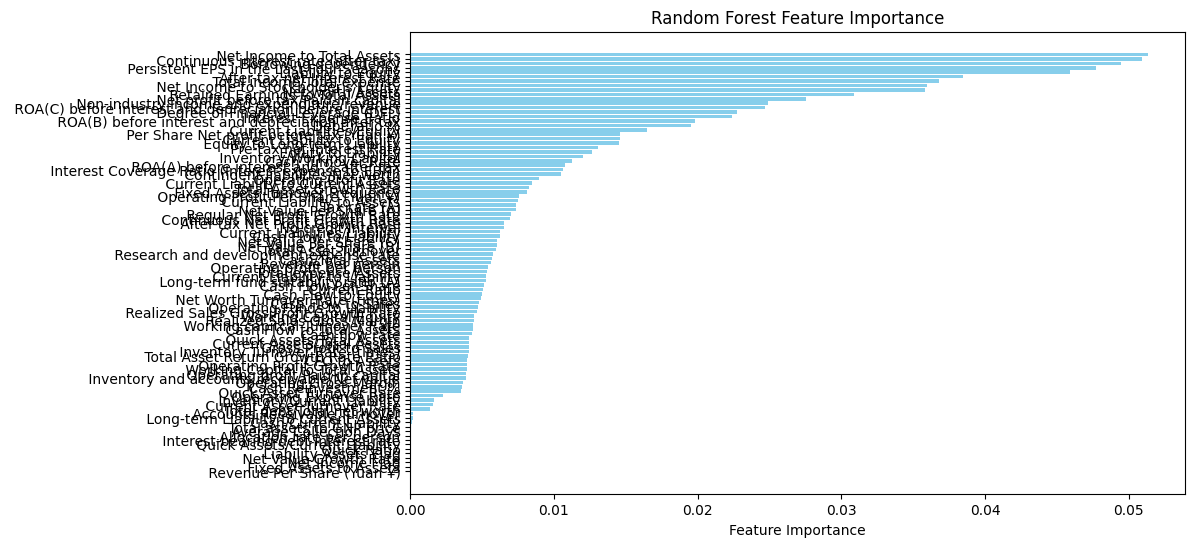

In [16]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a list of feature names
features = x.columns

# Sort the features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

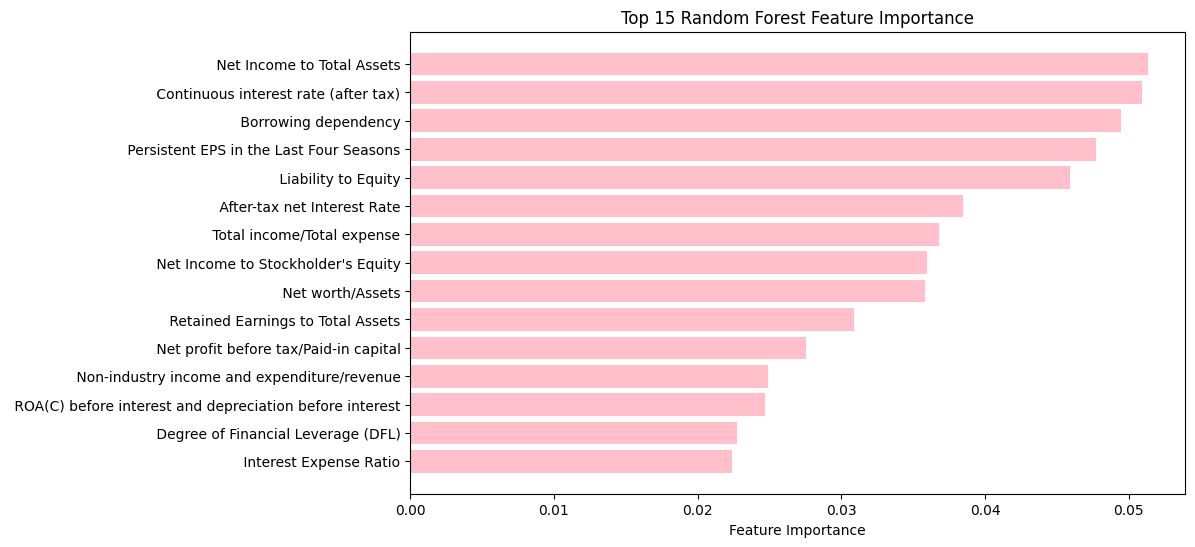

In [29]:
# Number of top features to display
top_n = 15

# Select the top 15 most important features
top_features = sorted_features[:top_n]
top_importances = sorted_importances[:top_n]

# Plot the top 15 feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances, color ='pink')
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()


## Visualisations

In [31]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_pred_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.show()

# Function to plot feature importance (for Decision Tree and Random Forest)
def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1][:15]  # Top 15 features
        plt.figure(figsize=(10, 6))
        plt.barh([feature_names[i] for i in indices], importance[indices], color='skyblue')
        plt.xlabel('Feature Importance')
        plt.title(f'{model_name} Feature Importance (Top 15)')
        plt.gca().invert_yaxis()
        plt.show()

### Logistic Regression

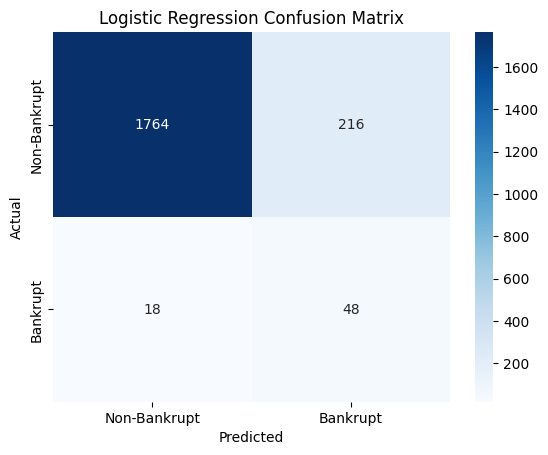

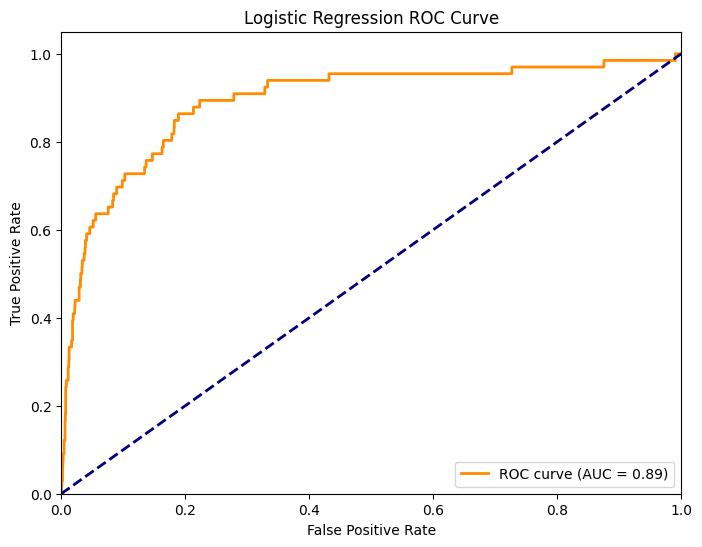

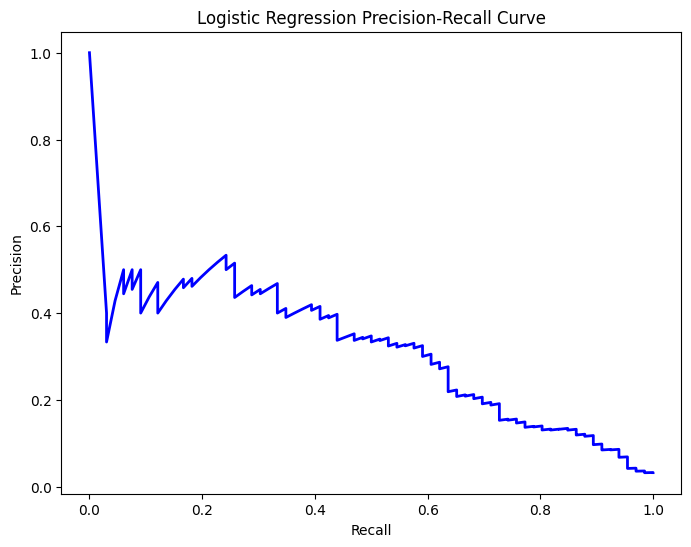

In [35]:
# Logistic Regression Predictions
y_pred_lr = model.predict(x_test_scaled)
y_pred_lr_proba = model.predict_proba(x_test_scaled)[:, 1]

# Function to plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

# ROC Curve for Logistic Regression
plot_roc_curve(y_test, y_pred_lr_proba, "Logistic Regression")

# Precision-Recall Curve for Logistic Regression
plot_precision_recall_curve(y_test, y_pred_lr_proba, "Logistic Regression")

### CART

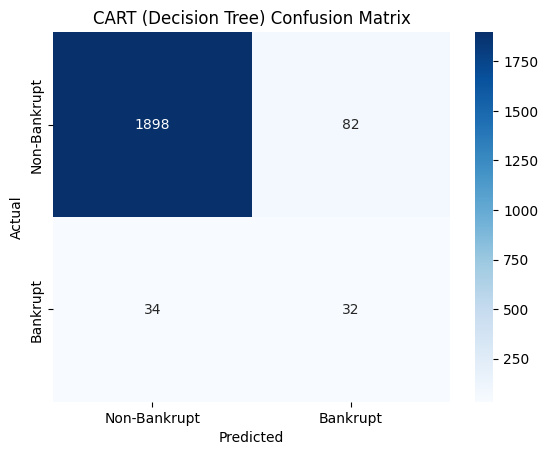

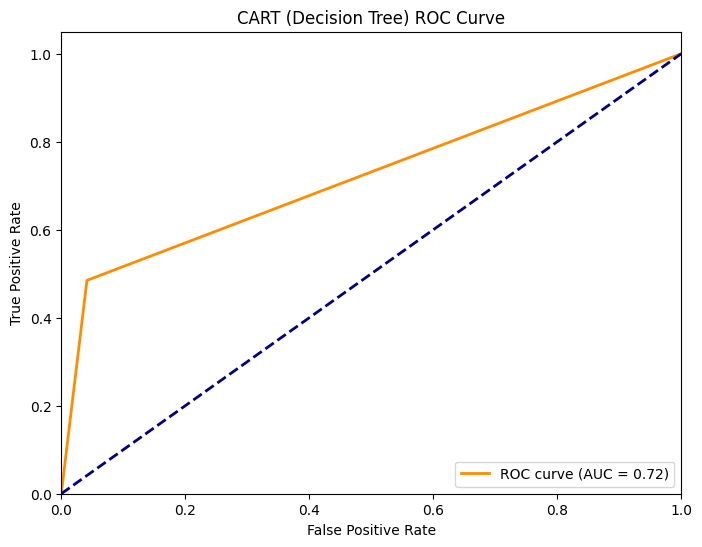

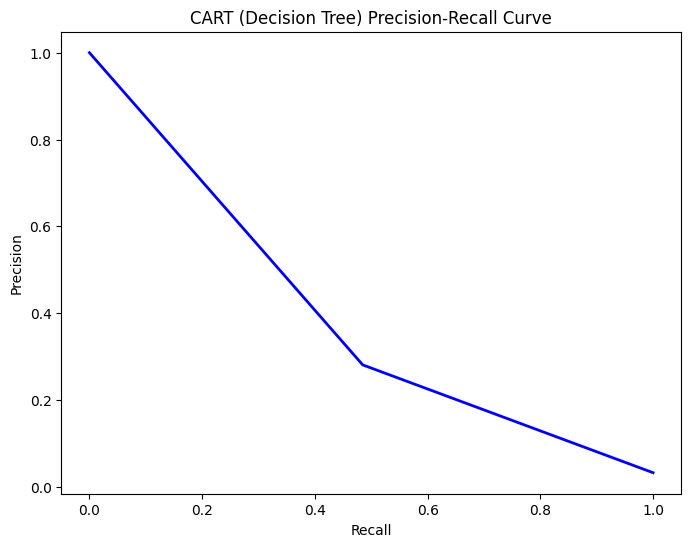

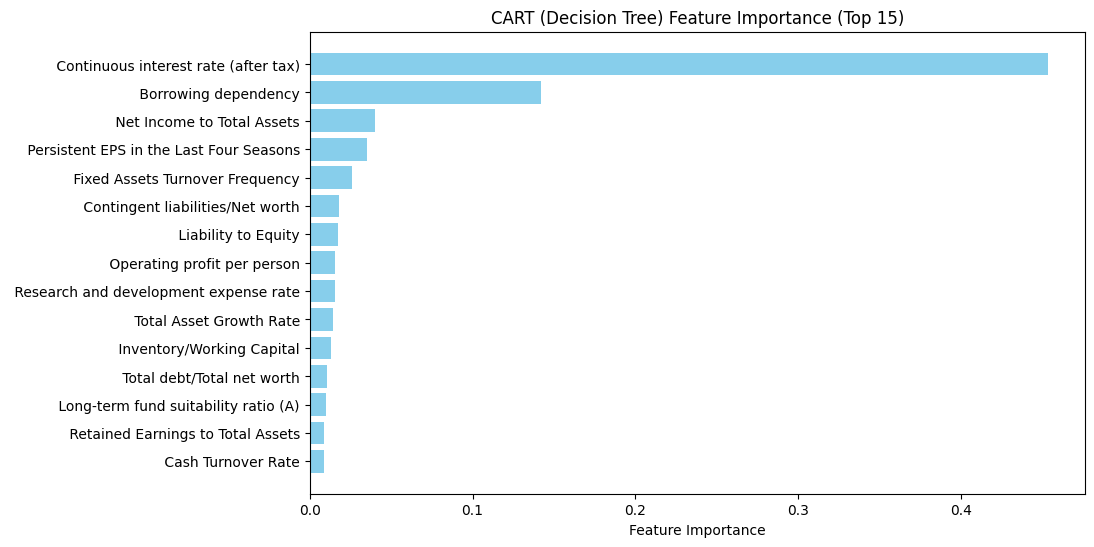

In [36]:
# CART (Decision Tree) Predictions
y_pred_cart = cart_model.predict(x_test_scaled)
y_pred_cart_proba = cart_model.predict_proba(x_test_scaled)[:, 1]

# Function to plot confusion matrix for CART
plot_confusion_matrix(y_test, y_pred_cart, "CART (Decision Tree)")

# ROC Curve for CART
plot_roc_curve(y_test, y_pred_cart_proba, "CART (Decision Tree)")

# Precision-Recall Curve for CART
plot_precision_recall_curve(y_test, y_pred_cart_proba, "CART (Decision Tree)")

# Feature Importance for CART
plot_feature_importance(cart_model, x.columns, "CART (Decision Tree)")

### Random Forest

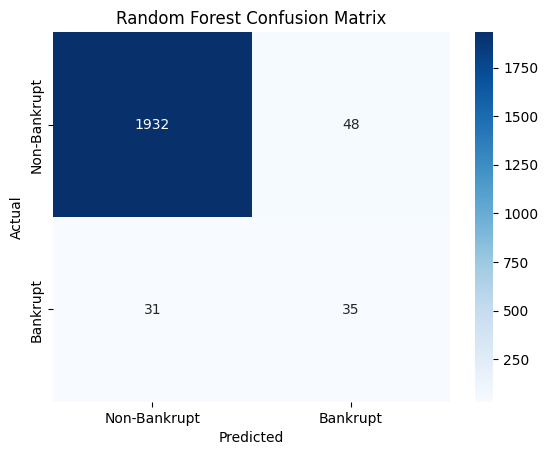

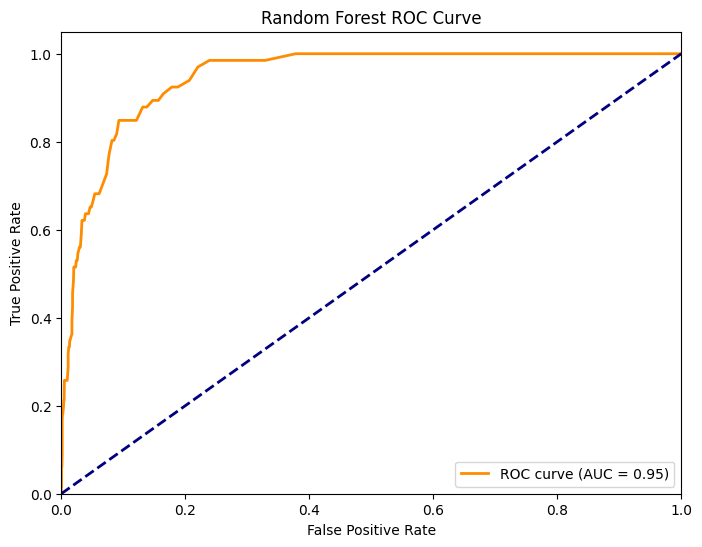

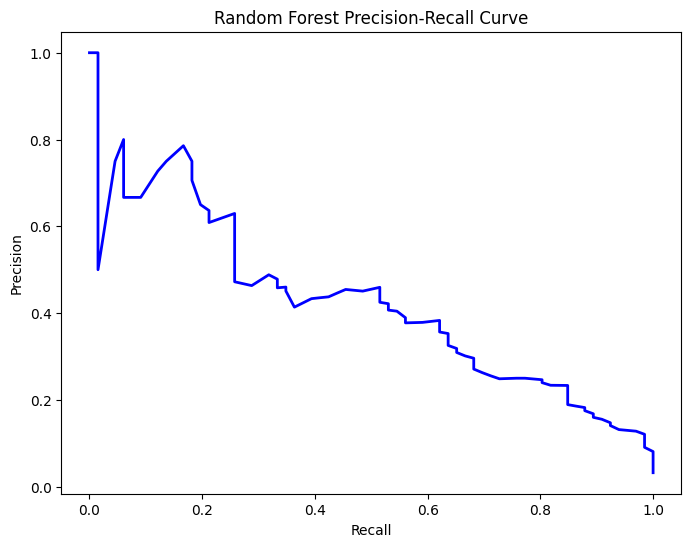

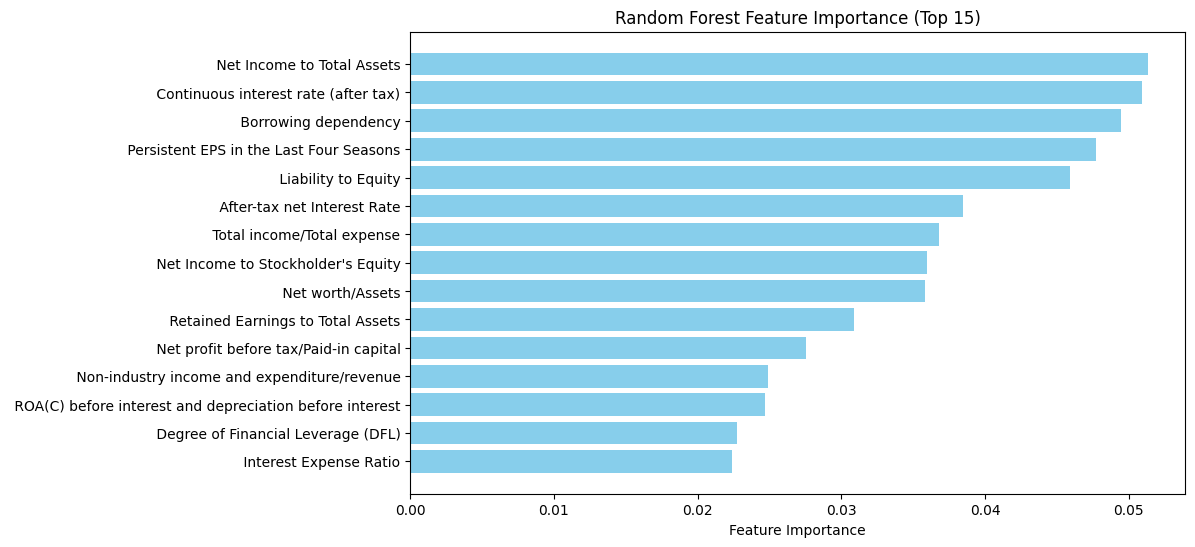

In [37]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(x_test_scaled)
y_pred_rf_proba = rf_model.predict_proba(x_test_scaled)[:, 1]

# Function to plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

# ROC Curve for Random Forest
plot_roc_curve(y_test, y_pred_rf_proba, "Random Forest")

# Precision-Recall Curve for Random Forest
plot_precision_recall_curve(y_test, y_pred_rf_proba, "Random Forest")

# Feature Importance for Random Forest
plot_feature_importance(rf_model, x.columns, "Random Forest")


## Comparison

In [39]:
# Logistic Regression Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_roc_lr = roc_auc_score(y_test, y_pred_lr_proba)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

# CART (Decision Tree) Metrics
accuracy_cart = accuracy_score(y_test, y_pred_cart)
auc_roc_cart = roc_auc_score(y_test, y_pred_cart_proba)
precision_cart = precision_score(y_test, y_pred_cart)
recall_cart = recall_score(y_test, y_pred_cart)
f1_cart = f1_score(y_test, y_pred_cart)

# Random Forest Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_rf_proba)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [accuracy_lr, auc_roc_lr, precision_lr, recall_lr, f1_lr],
    'CART (Decision Tree)': [accuracy_cart, auc_roc_cart, precision_cart, recall_cart, f1_cart],
    'Random Forest': [accuracy_rf, auc_roc_rf, precision_rf, recall_rf, f1_rf]
})

# Display the comparison table
print(comparison_df)


      Metric  Logistic Regression  CART (Decision Tree)  Random Forest
0   Accuracy             0.885630              0.943304       0.961388
1    AUC-ROC             0.891208              0.721717       0.947199
2  Precision             0.181818              0.280702       0.421687
3     Recall             0.727273              0.484848       0.530303
4   F1-Score             0.290909              0.355556       0.469799
